# Dataset analysis

In [1]:
speech_path, save_path = "data/raw/speech", "data/processed"

from src.utility import show_duration_distribution, plot_history, plot_clusters, plot_classes, plot_encoder_loss
from src.data_processing import FeatureExtractor
from src.dataset import Dataset
from src.loader import Loader

import numpy as np  
from tqdm import tqdm 

import seaborn as sns
sns.set_theme()

from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(1)

import warnings  
warnings.filterwarnings("ignore")

### Audio duration distribution

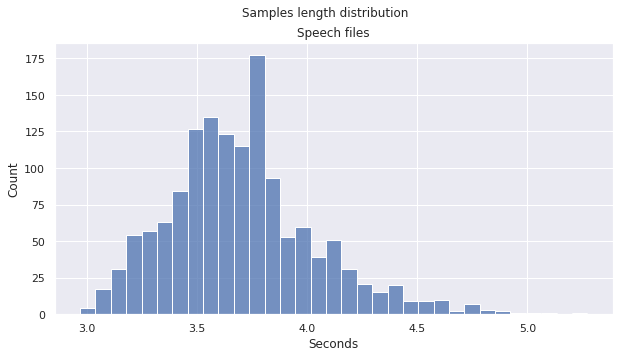

Max len of data samples:  116247.0


In [2]:
MAX_LEN = show_duration_distribution(speech_path, save_path, limit_per_actor=-1)
print("Max len of data samples: ", MAX_LEN)

### Preprocessing and feature extraction

In [3]:
loader = Loader(speech_path, save_path, True, int(MAX_LEN), -1)
data, labels = loader.load(False)

In [4]:
ext_features, ext_labels = FeatureExtractor(raw_data=data, 
                                            labels=labels, 
                                            save_path=f"{save_path}/features", 
                                            file_name="full",
                                            verbose=True, 
                                            only_mfcc=False).get_training_data(overwrite=False)

d = Dataset(original_data=(ext_features, ext_labels), augmented_data=[])
X_train, X_test, y_train, y_test = d.get_training_data(label="all", train_perc=0.98)

Filename: full found on disk



### Classes distribution

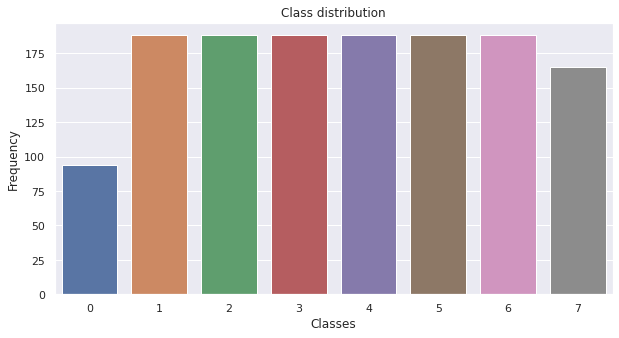

In [5]:
plot_classes(y_train)

### Data visualization

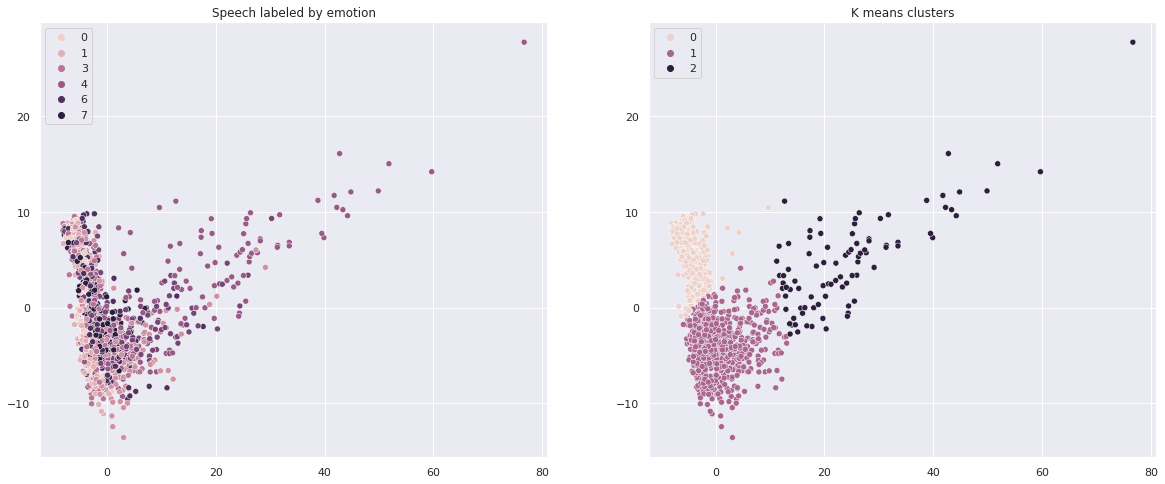

In [6]:
plot_clusters(d)